# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mn_police_use_of_force.csv to mn_police_use_of_force (1).csv
Saving justice_data.parquet to justice_data (1).parquet
Saving airbnb_hw.csv to airbnb_hw (1).csv


In [ ]:
#question 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data
df = pd.read_csv('airbnb_hw.csv',low_memory=False)
df.head()
df.tail()

#clean up the price variable
var = "Price"
df[var] = df[var].str.replace(",", "")      # remove commas
df[var] = pd.to_numeric(df[var], errors="coerce") # convert to numbers

# check missing values
missing = df[var].isna().sum()
print(f"Missing values in {var}: {missing}")
print(df["Price"].dtype)
#end up with zero missing values


Missing values in Price: 0
int64


In [ ]:
#question 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data
# Assuming the file is in the root of your Google Drive.
# If it's in a different folder, update the path accordingly.
df = pd.read_csv("mn_police_use_of_force.csv", low_memory=False)
df.head()
df.tail()


#Look at the raw values
var = "subject_injury"
print(df[var].unique(), '\n')   # see what categories are there

#Count each category
df[var].value_counts(dropna=False)

#Proportion missing
missing_count = 9848
total = 12925
prop_missing = missing_count / total
print(f"{prop_missing:.2%}")
# This is concerning becayse a majority of observations don't record
# whether the subject was injured. This makes the variable highly incomplete.

#cross tabulate
ct = pd.crosstab(df["subject_injury"], df["force_type"], dropna=False)
print(ct)
# A cross-tabulation of subject_injury with force_type shows that most missing
# values occur in incidents coded as Bodily Force and Chemical Irritant, while
# categories like Police K9 Bite and Taser tend to have injury outcomes more
#consistently recorded. In fact, for some force types (Maximal Restraint Technique),
# all injury outcomes are missing.
#this pattern indicates that nan likely reflects differences in reporting
#practices by force type rather than random omissions. As a result, conclusions
#drawn about injuries may underestimate injuries for certain categories of force.

[nan 'No' 'Yes'] 

76.19%
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   
NaN                 2          7051               1421        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Yes                            44                 40            0   
NaN                            27                 74           87   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
No                                   1                            0   
Yes                                  2                            0   
NaN     

In [1]:
#question 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
df.head()

# Step 1: Look at unique values
var = 'WhetherDefendantWasReleasedPretrial' # A Dummy Example

# Step 2: Replace explicit "missing" codes with NaN
df[var] = df[var].replace([9, 99, "NA", "na", "missing", "unknown", ""], np.nan)

# Step 3: Standardize Yes/No or 1/0 if present
df[var] = df[var].replace({
    "Yes": 1, "yes": 1, "1": 1,
    "No": 0, "no": 0, "0": 0
})

# Step 4: Force to numeric (allows NaN)
df[var] = pd.to_numeric(df[var], errors="coerce")

# Step 5: Check results
print(df[var].value_counts(dropna=False))
print(df[var].unique())


WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64
[nan  0.  1.]


In [7]:
#question 4

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you
df.head()

var1 = "ImposedSentenceAllChargeInContactEvent"
var2 = "SentenceTypeAllChargesAtConvictionInContactEvent"

print(df[var1].unique()[:20])   # first 20 unique values
print(df[var2].unique()[:20])

# Replace blanks with NaN
df[var1] = df[var1].replace(" ", np.nan)

# Convert to numeric
df[var1] = pd.to_numeric(df[var1], errors="coerce")

pd.crosstab(df[var2], df[var1].isna(), margins=True)

print(df[var1].describe())



[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96']
[9 0 1 4 2]
count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: ImposedSentenceAllChargeInContactEvent, dtype: float64


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [13]:
#question 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("GSAF5.xls", engine="xlrd")
print(df.head())

               Date    Year        Type      Country  \
0  16th August 2025  2025.0    Provoked          USA   
1       18th August  2025.0  Unprovoked    Australia   
2       17th August  2025.0  Unprovoked      Bahamas   
3        7th August  2025.0  Unprovoked    Australia   
4        1st August  2025.0  Unprovoked  Puerto Rico   

                               State                             Location  \
0                            Florida               Cayo Costa Boca Grande   
1                                NSW                       Cabarita Beach   
2  Atlantic Ocean near Big Grand Cay  North of Grand Bahama near Freeport   
3                                NSW                        Tathra Beach    
4                           Carolina                       Carolina Beach   

       Activity          Name Sex Age  ...                 Species   \
0       Fishing   Shawn Meuse   M   ?  ...  Lemon shark 1.8 m (6ft)   
1       Surfing     Brad Ross   M   ?  ...  5m (16.5ft) Gr

In [15]:
#question 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Drop columns where ALL values are missing
df = df.dropna(axis=1, how="all")

print(df.shape)   # check new shape
print(df.columns) # see remaining columns
df.info()

(7042, 23)
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7042 non-null   object 
 1   Year            7040 non-null   float64
 2   Type            7024 non-null   object 
 3   Country         6992 non-null   object 
 4   State           6557 non-null   object 
 5   Location        6475 non-null   object 
 6   Activity        6457 non-null   object 
 7   Name            6823 non-null   object 
 8   Sex             6463 non-null   object 
 9   Age             4048 non-null   object 
 10  Injury          7007 non-null   

0 2026
count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64
1940 2026
Year
1940    24
1941    27
1942    41
1943    28
1944    31
Name: count, dtype: int64


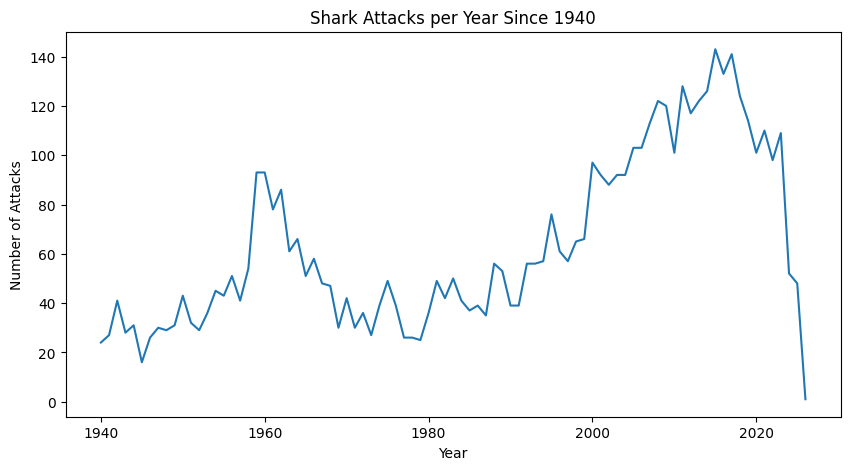

In [20]:
#question 3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert to numeric (non-numeric entries → NaN)
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# Drop rows with missing year
df = df.dropna(subset=["Year"])

# Force to integer
df["Year"] = df["Year"].astype(int)

#descrive the range of values
print(df["Year"].min(), df["Year"].max())
print(df["Year"].describe())

#filter since 1940
df_recent = df[df["Year"] >= 1940]
print(df_recent["Year"].min(), df_recent["Year"].max())

#count attacks per year
attacks_per_year = df_recent["Year"].value_counts().sort_index()
print(attacks_per_year.head())

#plot trends
attacks_per_year.plot(kind="line", figsize=(10,5), title="Shark Attacks per Year Since 1940")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.show()

#conclusion: shark attack rates flucuated from 1940-2010,
#first increasing, then decreasing, then increasing again.
#Then there was a sharp drop off after about 2010.

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30]


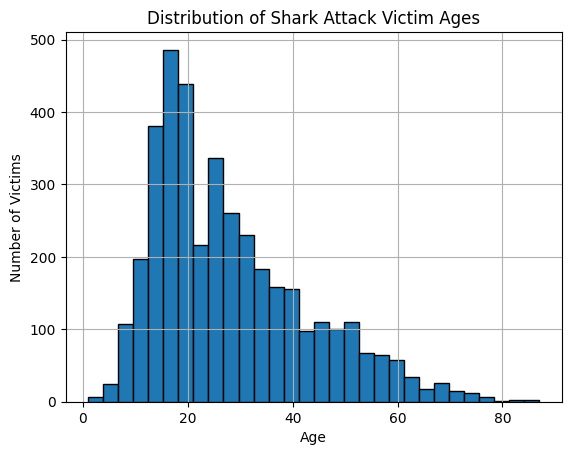

In [23]:
#question 4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(df["Age"].unique()[:50])   # peek at some values

# Replace '?' with NaN, remove '+' signs, and convert to numeric
df["Age_clean"] = (
    df["Age"]
      .astype(str)              # ensure strings
      .str.strip()              # remove spaces
      .str.replace("+", "", regex=False)  # drop plus signs
      .replace("?", np.nan)     # mark ? as missing
)

# Convert everything else to numbers
df["Age_clean"] = pd.to_numeric(df["Age_clean"], errors="coerce")

#histogram
df["Age_clean"].dropna().hist(bins=30, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Number of Victims")
plt.title("Distribution of Shark Attack Victim Ages")
plt.show()

In [28]:
#question 5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(df["Sex"].unique())
print(df["Sex"].value_counts(dropna=False))

#clean the sex variable
df["Sex_clean"] = (
    df["Sex"]
      .astype(str).str.strip().str.upper()  # remove spaces + standardize
      .replace({
          "M": "M",
          "F": "F",
          "M X 2": "M",   # assume multiple men → count as male
          "N": np.nan,
          "LLI": np.nan,
          ".": np.nan,
          "": np.nan,
          "NAN": np.nan
      })
)

print(df["Sex_clean"].value_counts(dropna=False))

#proportion of male victims
male_count = (df["Sex_clean"] == "M").sum()
female_count = (df["Sex_clean"] == "F").sum()
total_known = male_count + female_count

prop_male = male_count / total_known if total_known > 0 else np.nan

print(f"Male victims: {male_count}")
print(f"Female victims: {female_count}")
print(f"Proportion male: {prop_male:.2%}")


['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2' 'N' '.']
Sex
M        5645
F         804
NaN       579
M           3
F           2
N           2
 M          1
m           1
lli         1
M x 2       1
.           1
Name: count, dtype: int64
Sex_clean
M      5651
F       806
NaN     583
Name: count, dtype: int64
Male victims: 5651
Female victims: 806
Proportion male: 87.52%
